# PyTorch

GPUを使いたい場合は、互換性のあるNVIDIAのグラフィックボードを準備し、CUDA ToolkitとcuDNN(CUDA Deep Neural Network)ライブラリをインストールしておく必要がある。

### テンソルの作成

In [1]:
import torch
import numpy as np
np.set_printoptions(precision=3)
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)
t_a = torch.tensor(a)
t_b = torch.from_numpy(b)
print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [2]:
t_ones = torch.ones(2, 3)
t_ones.shape
print(t_ones)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [3]:
rand_tensor = torch.rand(2, 3)
print(rand_tensor)

tensor([[0.8915, 0.7089, 0.7958],
        [0.0181, 0.2539, 0.4981]])


### 形状操作

In [4]:
t_a_new = t_a.to(torch.int64)
print(t_a_new.dtype)

torch.int64


In [5]:
t = torch.rand(3, 5)
t_tr = torch.transpose(t, 0, 1)
print(t.shape, '-->', t_tr.shape)

torch.Size([3, 5]) --> torch.Size([5, 3])


In [6]:
t = torch.zeros(30)
t_reshape = t.reshape(5, 6)
print(t_reshape.shape)

torch.Size([5, 6])


In [7]:
t = torch.zeros(1, 2, 1, 4, 1)
t_sqz = torch.squeeze(t, 2) # 2nd dimensionを削除
print(t.shape, '-->', t_sqz.shape)

torch.Size([1, 2, 1, 4, 1]) --> torch.Size([1, 2, 4, 1])


### 算術演算

In [8]:
torch.manual_seed(1)  # 乱数のシードを設定
t1 = 2 * torch.rand(5, 2) - 1
t2 = torch.normal(mean=0, std=1, size=(5, 2)) # 正規分布に従う乱数サンプリング

In [9]:
t3 = torch.multiply(t1, t2)
print(t3)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])


In [10]:
t4 = torch.mean(t1, axis=0)  # axis=0で平均を計算
print(t4)

tensor([-0.1373,  0.2028])


In [11]:
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))  # 行列の積
print(t5)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


In [12]:
t6 = torch.matmul(torch.transpose(t1, 0, 1), t2)  # 転置行列との積
print(t6)

tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])


In [13]:
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)  # 各行のL2ノルムを計算
print(norm_t1)

tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


テンソルの$L^p$ノルムを計算できる。

### テンソルの分割、積み上げ、連結

In [14]:
# 同じサイズで分割（割り切れる必要あり）
torch.manual_seed(1)
t = torch.rand(6)
print(t)
t_splits = torch.chunk(t, 3)
print([item.numpy() for item in t_splits])

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])
[array([0.758, 0.279], dtype=float32), array([0.403, 0.735], dtype=float32), array([0.029, 0.8  ], dtype=float32)]


In [15]:
# 異なるサイズでの分割
torch.manual_seed(1)
t = torch.rand(5)
print(t)
t_splits = torch.split(t, split_size_or_sections=[3, 2])
print([item.numpy() for item in t_splits])

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])
[array([0.758, 0.279, 0.403], dtype=float32), array([0.735, 0.029], dtype=float32)]


In [16]:
#  結合
A = torch.ones(3)
B = torch.zeros(2)
C = torch.cat((A, B), dim=0)  # dim=0で結合
print(C)

tensor([1., 1., 1., 0., 0.])


In [17]:
# 積み上げ
A = torch.ones(3)
B = torch.zeros(3)
C = torch.stack((A, B), dim=1)  # dim=0でスタック
print(C)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


## 入力パイプラインの構築

一般的な状況では、データセットが大きすぎてテンソルをメモリに読み込めないため、HDDたSSDなどのメインストレージデバイスからデータをバッチごとに読み込む必要がある。それに加えて、データに特定の変換や前処理を適用するためのデータ処理パイプラインを構築する必要があるかもしれない。  
PyTorchには、効率的で便利な前処理パイプラインを構築するための特別なクラスが定義されている。

### DataLoaderを既存のテンソルから作成

In [18]:
from torch.utils.data import DataLoader
t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [19]:
data_loader = DataLoader(t, batch_size=3, drop_last=False)  # 最後のバッチをドロップするか。デフォルトはFalse。
for i, batch in enumerate(data_loader, 1):
    print(f"Batch {i}: {batch}")

Batch 1: tensor([0., 1., 2.])
Batch 2: tensor([3., 4., 5.])


DataLoaderを利用すれば、データセットのバッチ分割をカスタマイズ可能な方法で自動的に行うことができる。

### 2つのテンソルを1つのデータセットに結合する

In [20]:
torch.manual_seed(1)
t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4) # クラスラベルを含んでいる。

In [21]:
# 結合データセットの作成
from torch.utils.data import Dataset
class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [22]:
joint_dataset = JointDataset(t_x, t_y)
for example in joint_dataset:
    print(' x:', example[0], ' y:', example[1])

 x: tensor([0.7576, 0.2793, 0.4031])  y: tensor(0)
 x: tensor([0.7347, 0.0293, 0.7999])  y: tensor(1)
 x: tensor([0.3971, 0.7544, 0.5695])  y: tensor(2)
 x: tensor([0.4388, 0.6387, 0.5247])  y: tensor(3)


In [23]:
# 単にTensorDatasetを使うこともできる
from torch.utils.data import TensorDataset
joint_dataset = TensorDataset(t_x, t_y)

### シャッフル、バッチ、リピート

In [24]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

In [25]:
for epoch in range(2):
    print(f"Epoch {epoch + 1}")
    for i, batch in enumerate(data_loader, 1):
        print(f'Batch {i}:', 'x:', batch[0], '\n       y:', batch[1])

# イテレーションごとにデータがシャッフルされる

Epoch 1
Batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
       y: tensor([2, 0])
Batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
       y: tensor([1, 3])
Epoch 2
Batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
       y: tensor([0, 2])
Batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
       y: tensor([1, 3])


### ローカルディスク上のファイルからデータセットを作成する

In [26]:
# 画像ファイルのパスのリストを作っている
import pathlib

imgdir_path = pathlib.Path('cat_dog_images')

file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

print(file_list)

['cat_dog_images/cat-01.jpg', 'cat_dog_images/cat-02.jpg', 'cat_dog_images/cat-03.jpg', 'cat_dog_images/dog-01.jpg', 'cat_dog_images/dog-02.jpg', 'cat_dog_images/dog-03.jpg']


Image shape: (900, 1200, 3)
Image shape: (900, 1200, 3)
Image shape: (900, 742, 3)
Image shape: (800, 1200, 3)
Image shape: (800, 1200, 3)
Image shape: (900, 1200, 3)


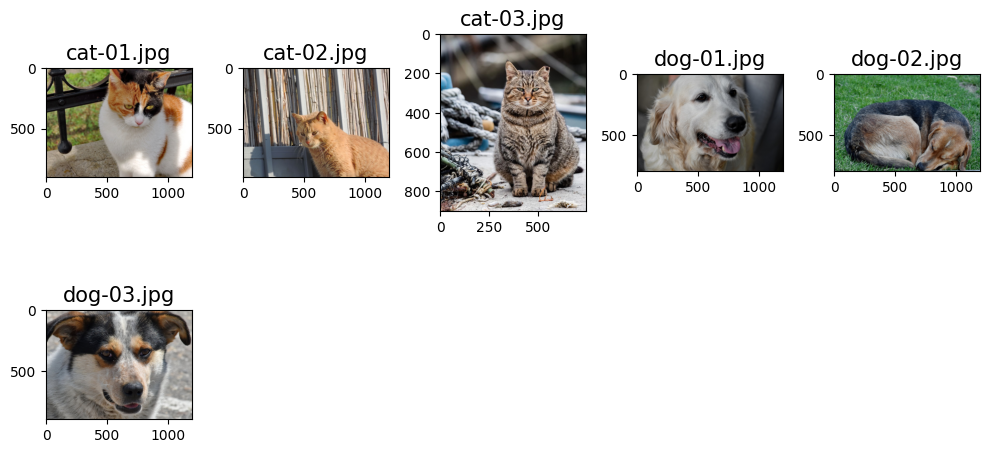

In [27]:
import matplotlib.pyplot as plt
import os
from PIL import Image

fig = plt.figure(figsize=(10, 5))
for i,file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape:', np.array(img).shape)
    ax = fig.add_subplot(2, 5, i + 1)
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
    
# plt.savefig('ch13-catdot-examples.pdf')
plt.tight_layout()
plt.show()

In [28]:
# 犬にラベル1、猫にラベル0を付ける
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [29]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, index):
        file = self.file_list[index]
        label = self.labels[index]
        return file, label

image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
    print(file, label)

cat_dog_images/cat-01.jpg 0
cat_dog_images/cat-02.jpg 0
cat_dog_images/cat-03.jpg 0
cat_dog_images/dog-01.jpg 1
cat_dog_images/dog-02.jpg 1
cat_dog_images/dog-03.jpg 1


### 画像を目的のサイズに変換

In [32]:
import torchvision.transforms as transforms
img_height, img_width = 80, 120
transform = transforms.Compose([transforms.ToTensor(),
                                 transforms.Resize((img_height, img_width)),
])

In [33]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transforms = transform

    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transforms is not None:
            img = self.transforms(img)
        label = self.labels[index]
        return img, label
    
    def __len__(self):
        return len(self.labels)
    
image_dataset = ImageDataset(file_list, labels, transform=transform)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.000551827..1.0000002].


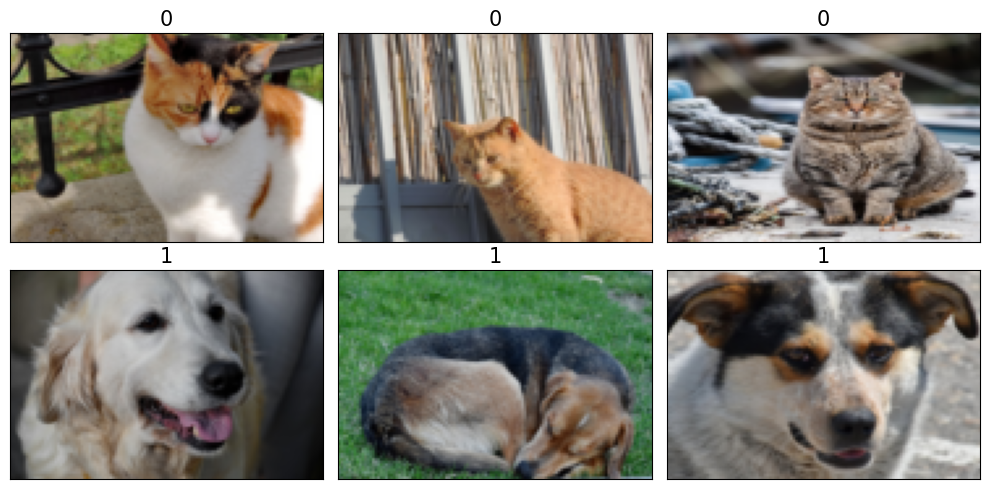

In [35]:
fig = plt.figure(figsize=(10, 5))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i + 1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose(1, 2, 0))
    ax.set_title(f'{example[1]}', size=15)
    
# plt.savefig('ch13-catdot-examples.pdf')
plt.tight_layout()
plt.show()